In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
from oauth2client.service_account import ServiceAccountCredentials

scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('ovmarkets-3dd85aa5a711.json', scope)

gc = gspread.authorize(credentials)

wks = gc.open("Indicator matching").get_worksheet(0)
dataframe = pd.DataFrame(wks.get_all_records())

In [2]:
dataframe_trim = dataframe.iloc[0:-650, 1:]#.tail(5)

In [3]:
dataframe_trim_bin = dataframe_trim.applymap(lambda x: 1 if x != '' else np.nan)
dataframe_trim_bin.loc[:, 'Category'] = dataframe_trim.loc[:, 'Category']
dataframe_trim_bin.loc[:, 'Abstract Indicator Name'] = dataframe_trim.loc[:, 'Abstract Indicator Name']

In [4]:
Indicators = pd.DataFrame(dataframe_trim_bin.sum(), columns=['Number'])
inx = [i for i in Indicators.index if i not in ['Abstract Indicator Name', 'Category']]
Indicators = Indicators.loc[inx]

In [5]:
Indicators.to_excel('indicators.xls')

In [6]:
Indicators.sum()

Number    2284.0
dtype: float64

In [7]:
Indicators_cat = pd.DataFrame(
    dataframe_trim_bin.groupby(['Category', 'Abstract Indicator Name']).sum().sum(axis=1),
    columns=['Number']
)

In [8]:
Indicators_cat.head()

Number
Category    Abstract Indicator Name        
Cooperation Cooperation                10.0
Economy     Decoupling                  2.0
            Employment                 70.0
            Equity                     28.0
            Expenses                    3.0

In [9]:
len(Indicators_cat.index)

140

In [10]:
Indicators_cat.to_excel('indicators_cat.xls')

In [11]:
Indicators_subcat = pd.DataFrame(
    dataframe_trim_bin.groupby('Category').sum().sum(axis=1),
    columns=['Number']
)

In [12]:
Indicators_subcat

Number
Category                     
Cooperation              10.0
Economy                 321.0
Education               122.0
Energy                  150.0
Environment             237.0
Finance                  39.0
Food                     55.0
Gender                   20.0
Geography and climate    43.0
Governance              169.0
Health                  149.0
Land Use                112.0
Materials                41.0
Other                     2.0
People                   83.0
Safety                  115.0
Solid waste             128.0
Telecommunication        29.0
Transportation          132.0
Urban planning           74.0
Wastewater               76.0
Water and sanitation    135.0
Wellbeing                42.0

In [13]:
dataframe_trim_bin_inx = dataframe_trim_bin.copy()
dataframe_trim_bin_inx = dataframe_trim_bin_inx.set_index(['Category', 'Abstract Indicator Name'])

In [14]:
dataframe_map = dataframe_trim_bin.groupby(['Category', 'Abstract Indicator Name']).sum()

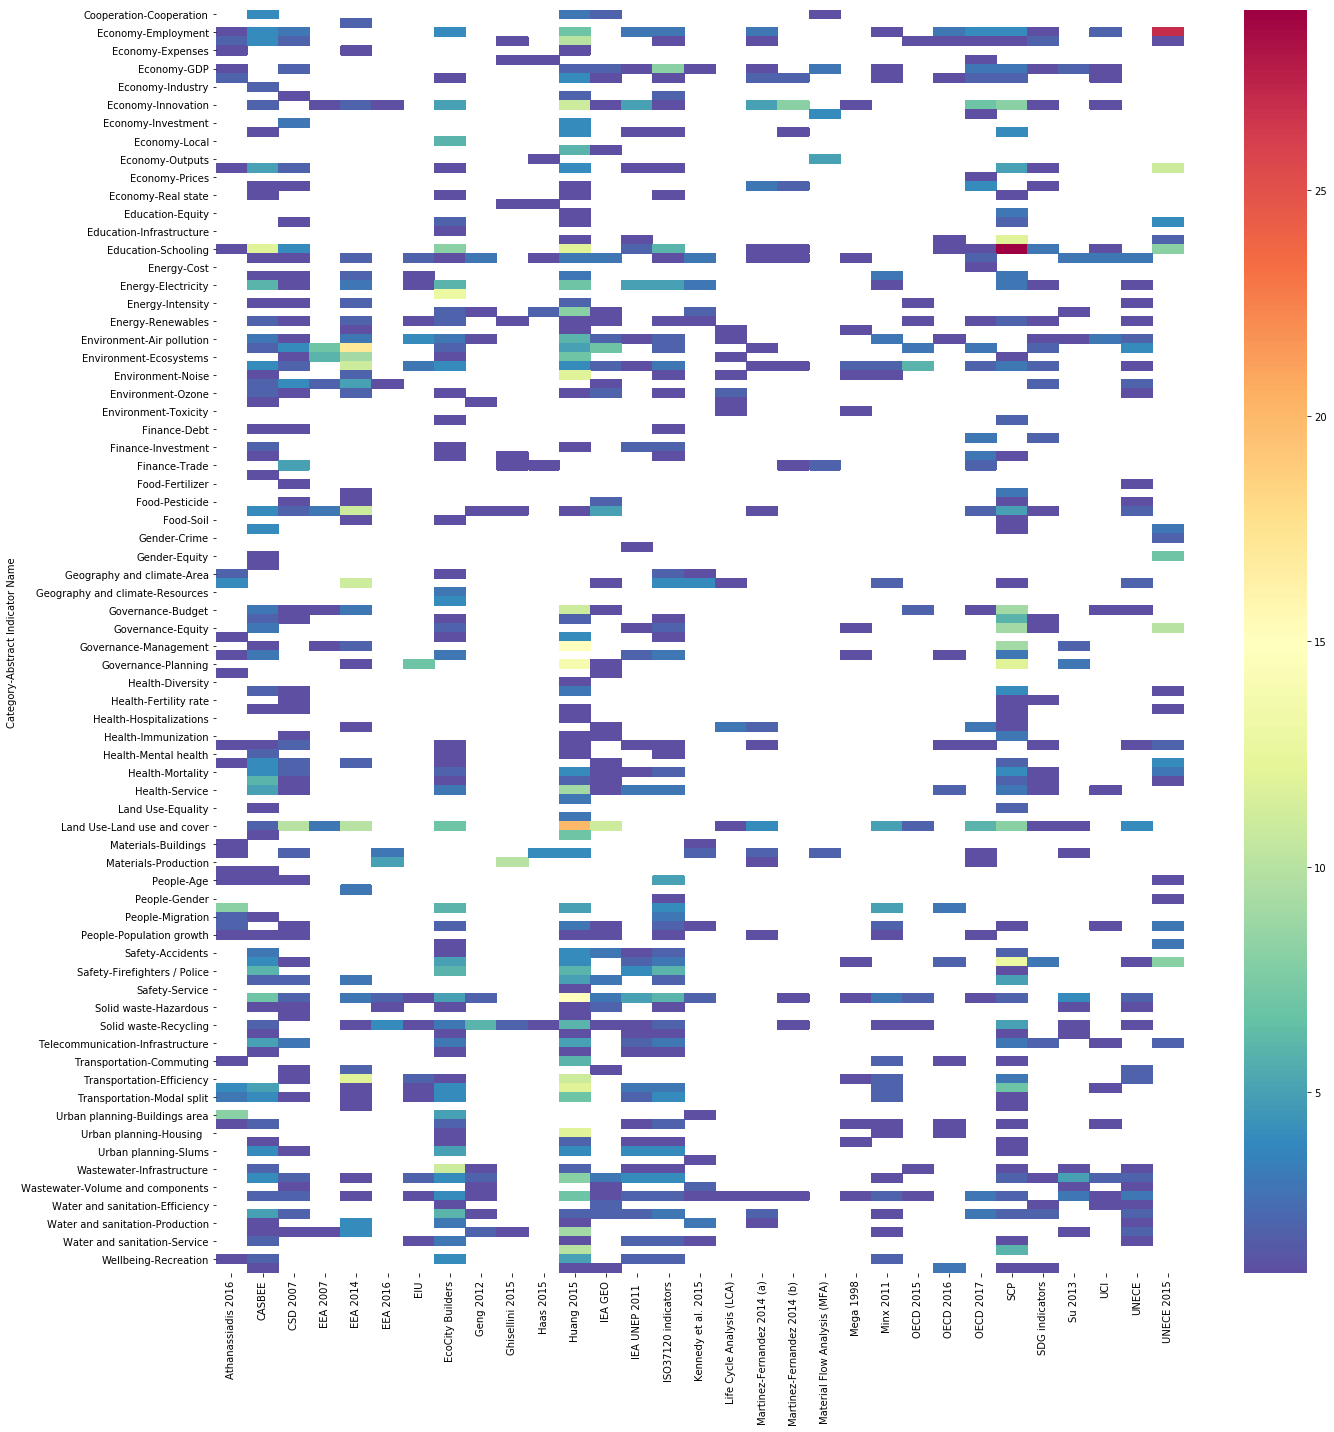

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(dataframe_map, annot=False, ax=ax, cmap='Spectral_r', square=False)#, vmin=1, vmax=10)
fig.tight_layout()
plt.savefig("heatmap.png", dpi=300)

In [16]:
dataframe_map_cat = dataframe_trim_bin.groupby(['Category']).sum()

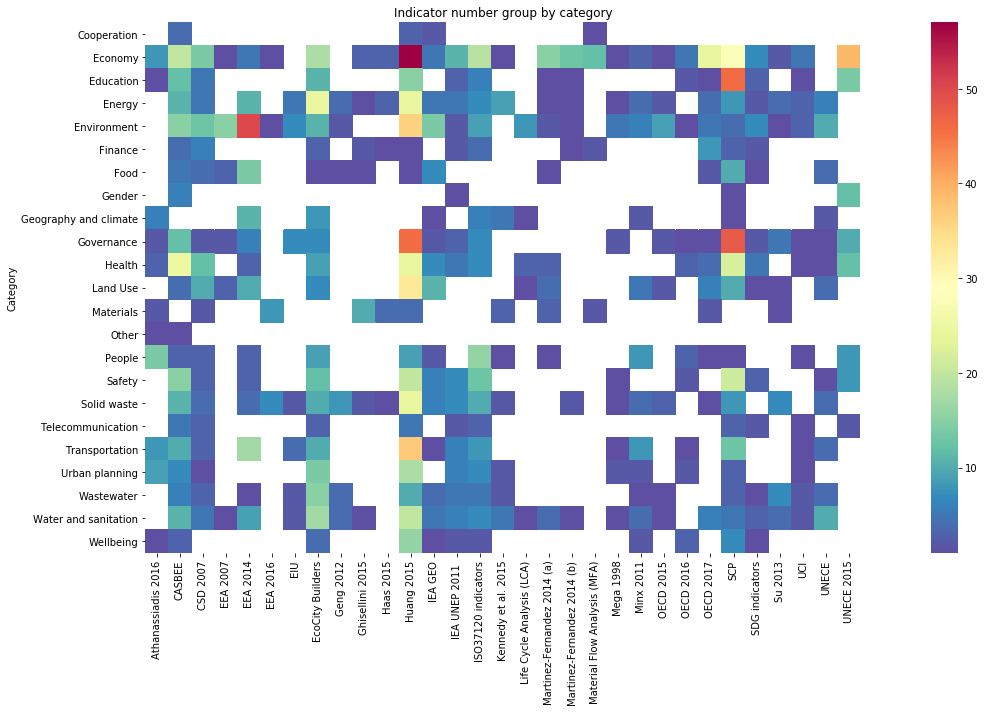

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataframe_map_cat, annot=False, ax=ax, cmap='Spectral_r', square=True)#, vmin=1, vmax=10)
ax.set_title("Indicator number group by category")
fig.tight_layout()
plt.savefig("heatmap_cat.png", dpi=300)

In [18]:
dataframe_map_cat_rel = dataframe_map_cat.div(dataframe_map_cat.sum()).mul(100)

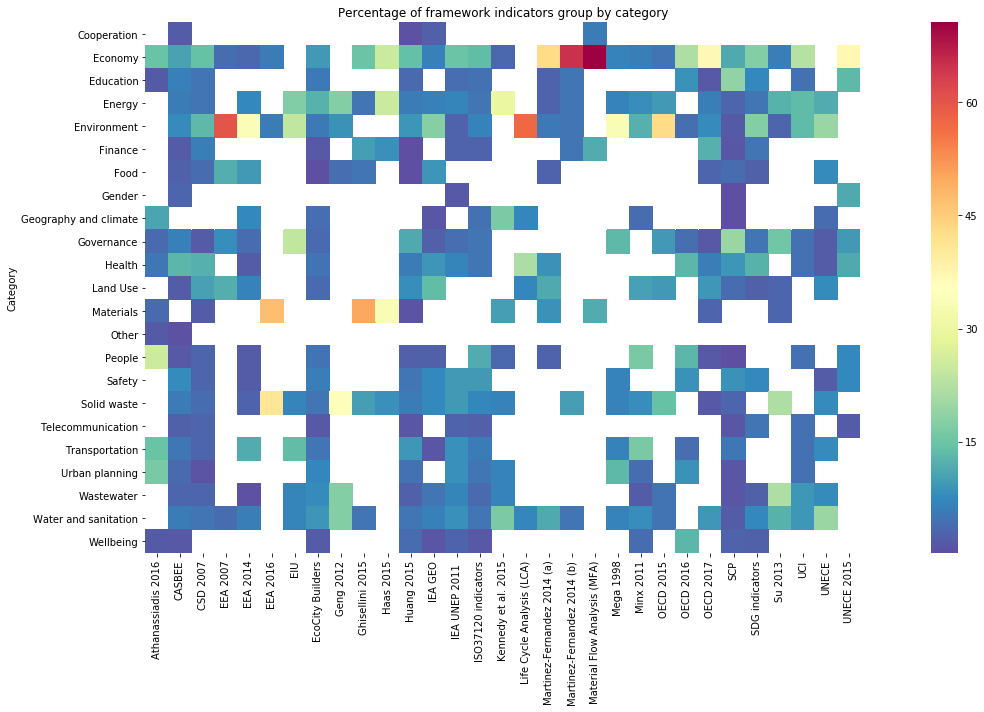

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataframe_map_cat_rel, annot=False, ax=ax, cmap='Spectral_r', square=True)#, vmin=1, vmax=10)
ax.set_title("Percentage of framework indicators group by category")
fig.tight_layout()
plt.savefig("heatmap_cat_rel.png", dpi=300)

In [20]:
CE = ['Geng 2012', 'Ghisellini 2015', 'Haas 2015', 'Su 2013', 'EEA 2016']
inx_CE = [i for i in dataframe_map_cat_rel.columns if i in CE]

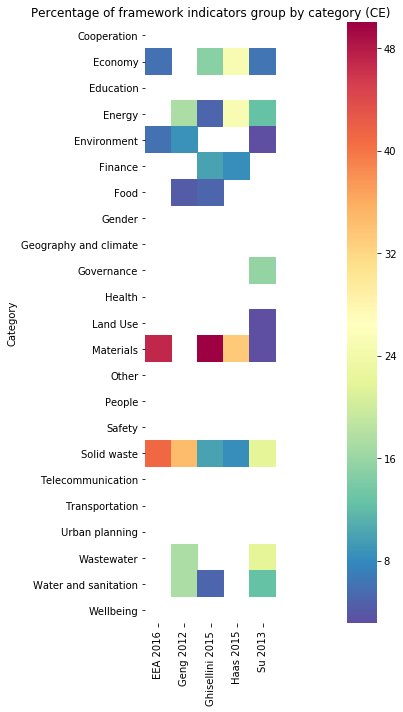

In [21]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataframe_map_cat_rel.loc[:, inx_CE], annot=False, ax=ax, cmap='Spectral_r', square=True)#, vmin=1, vmax=10)
ax.set_title("Percentage of framework indicators group by category (CE)")
fig.tight_layout()
plt.savefig("heatmap_cat_rel_CE.png", dpi=300)

In [22]:
from os import path
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = os.getcwd()
c_mask = np.array(Image.open(path.join(d, "circular2.png")))

stopwords = set(STOPWORDS)
stopwords.add("per")
stopwords.add("mean")
stopwords.add("data")
stopwords.add("rate")
stopwords.add("total")
stopwords.add("percentage")
stopwords.add("average")
stopwords.add("number")
stopwords.add("row")
stopwords.add("ratio")
stopwords.add("october")
stopwords.add("use")
for i in dataframe_map_cat_rel.index:
    stopwords.add(i)
    stopwords.add(i.lower())
    stopwords.add(i[0:-1])
    stopwords.add(i[0:-1].lower())

wc = WordCloud(background_color="white", max_words=2000, mask=c_mask,
               stopwords=stopwords)

In [23]:
cloud_df_ce = dataframe_trim.loc[:, inx_CE]
text = ' '.join([i.strip().lower() for i in cloud_df_ce.stack().tolist() if len(i) >= 2])

(-0.5, 721.5, 721.5, -0.5)

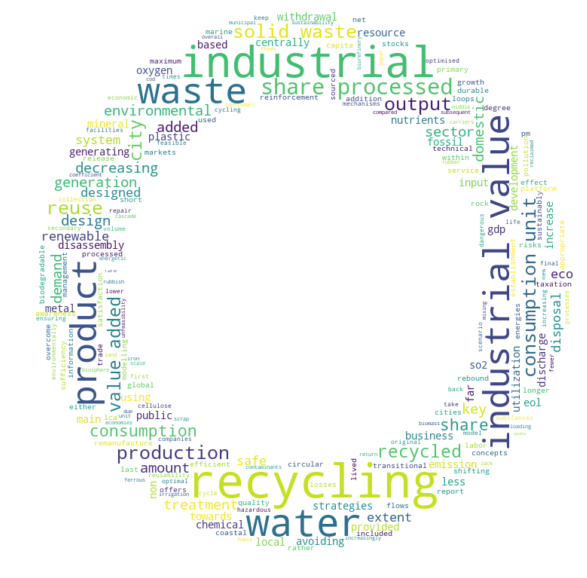

In [24]:
wc.generate(text)
wc.to_file(path.join(d, "tagcloud_CE.png"))
plt.subplots(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

/usr/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


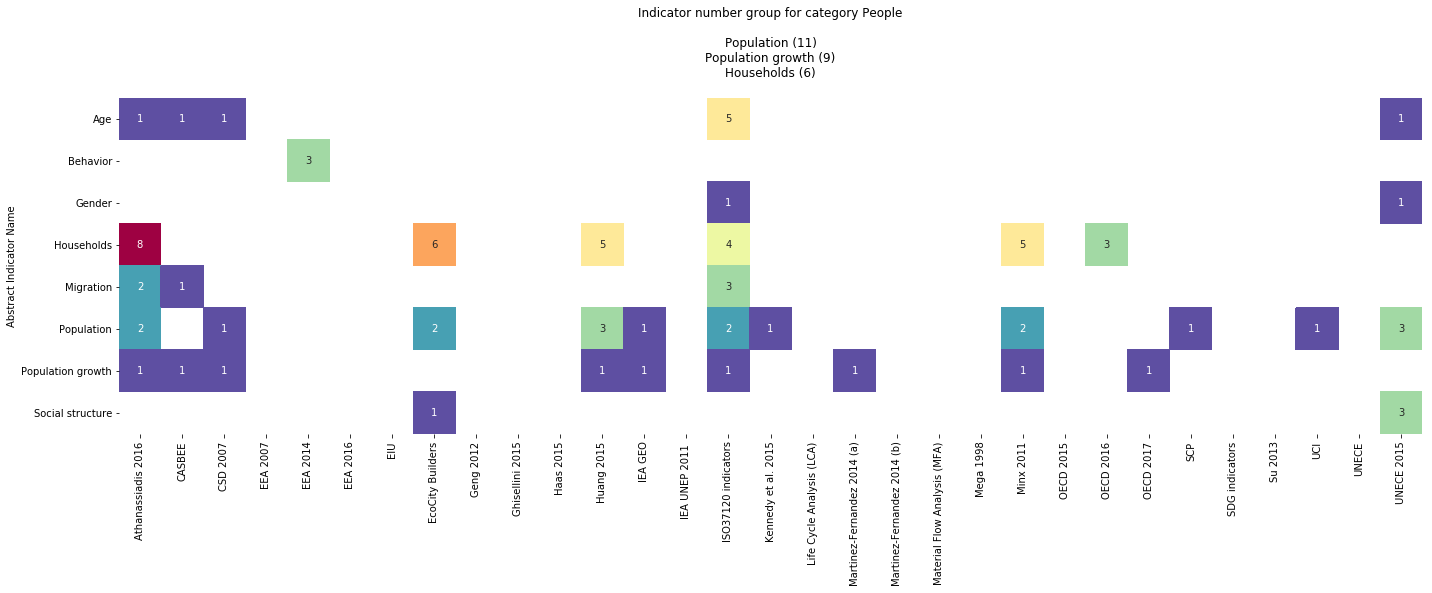

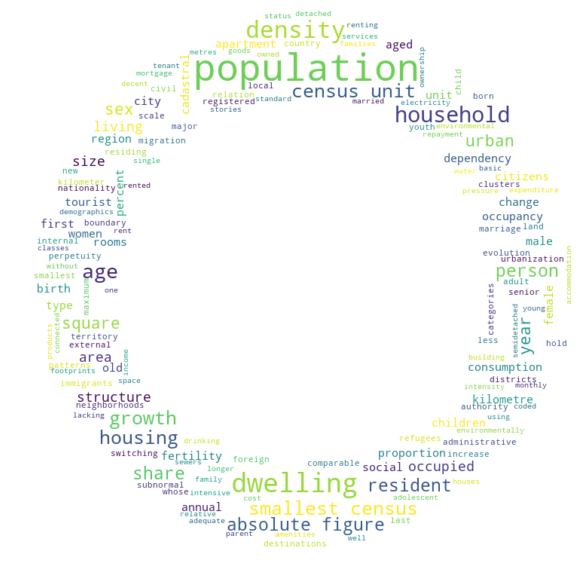

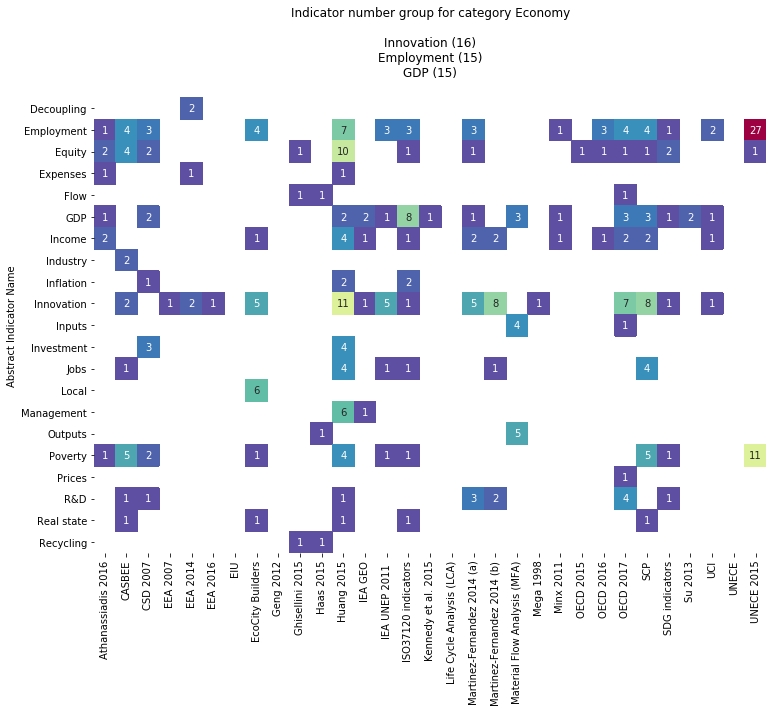

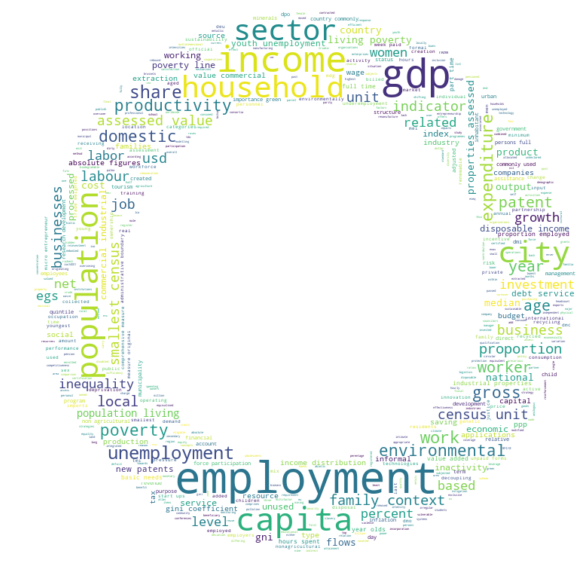

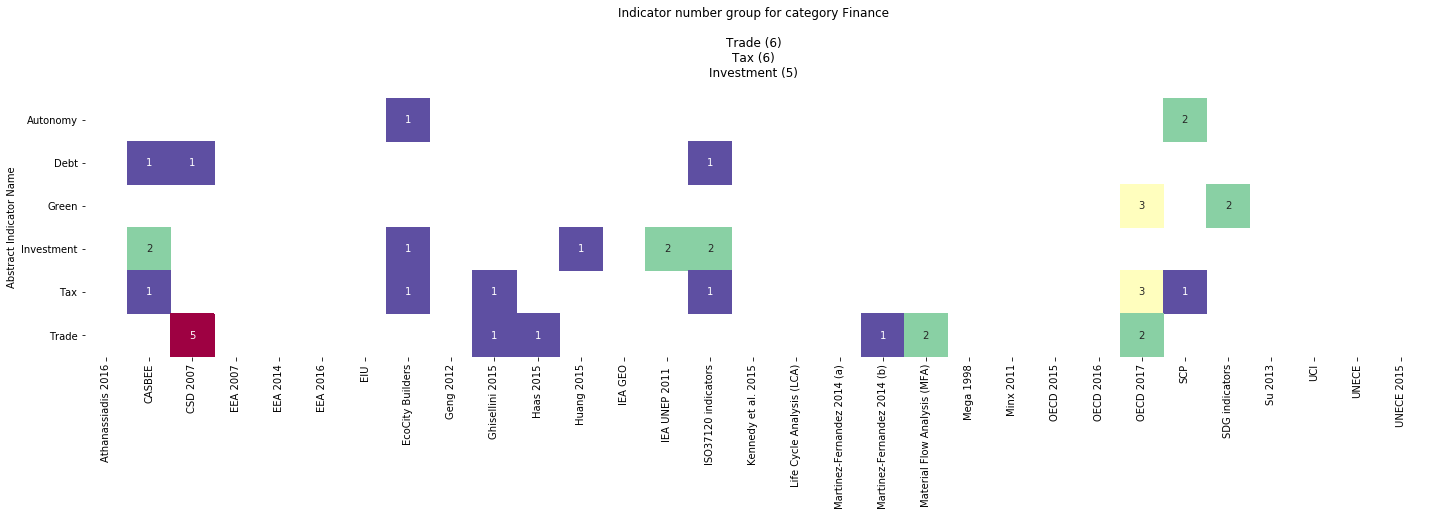

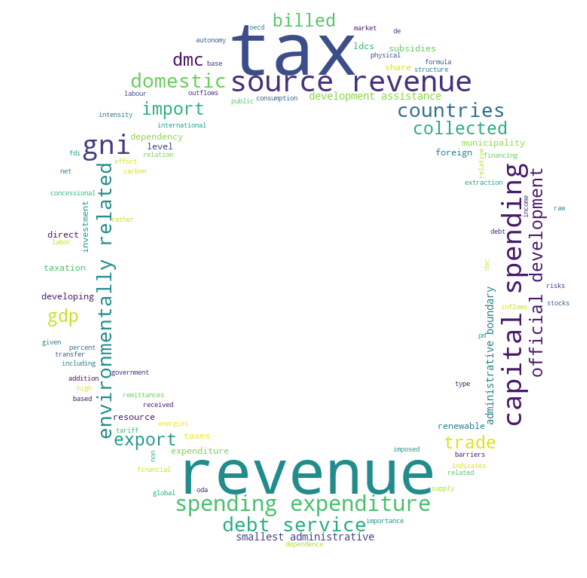

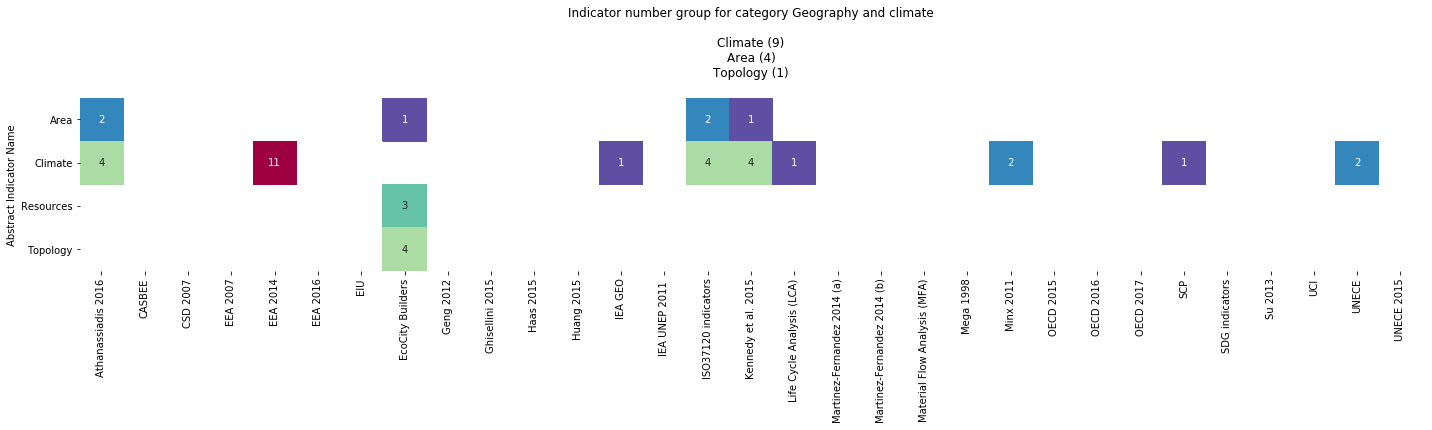

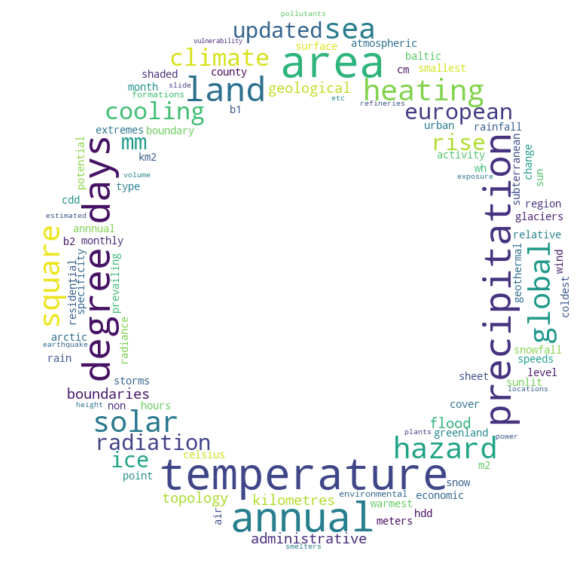

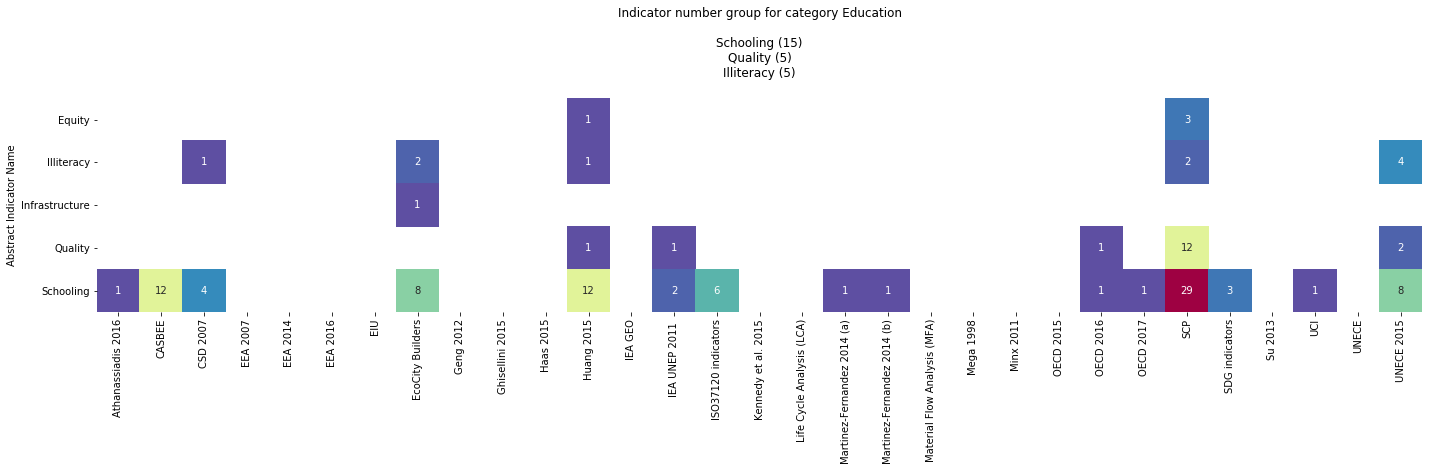

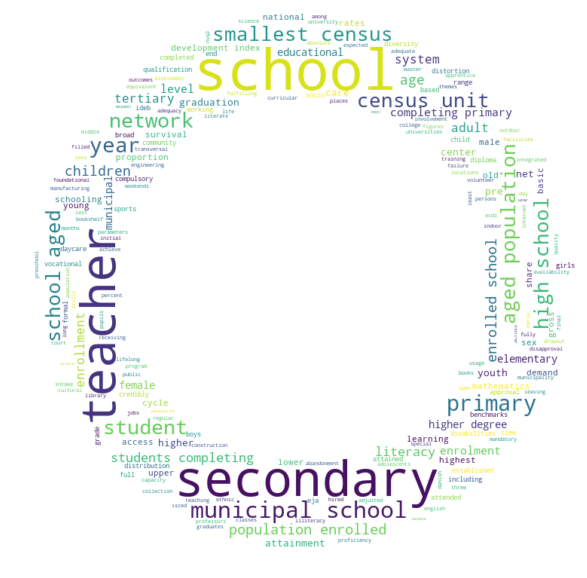

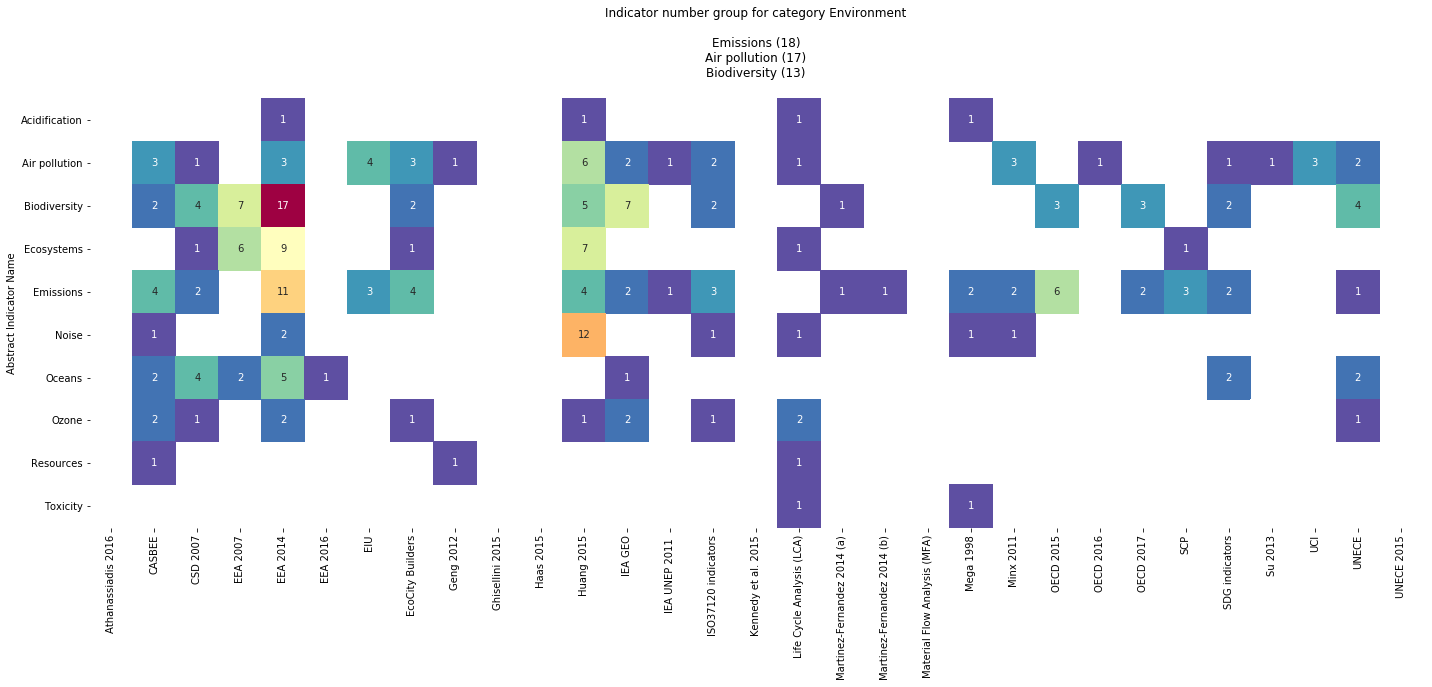

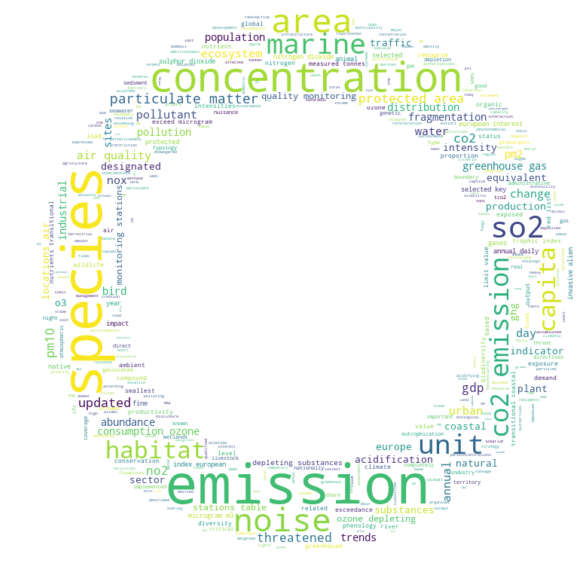

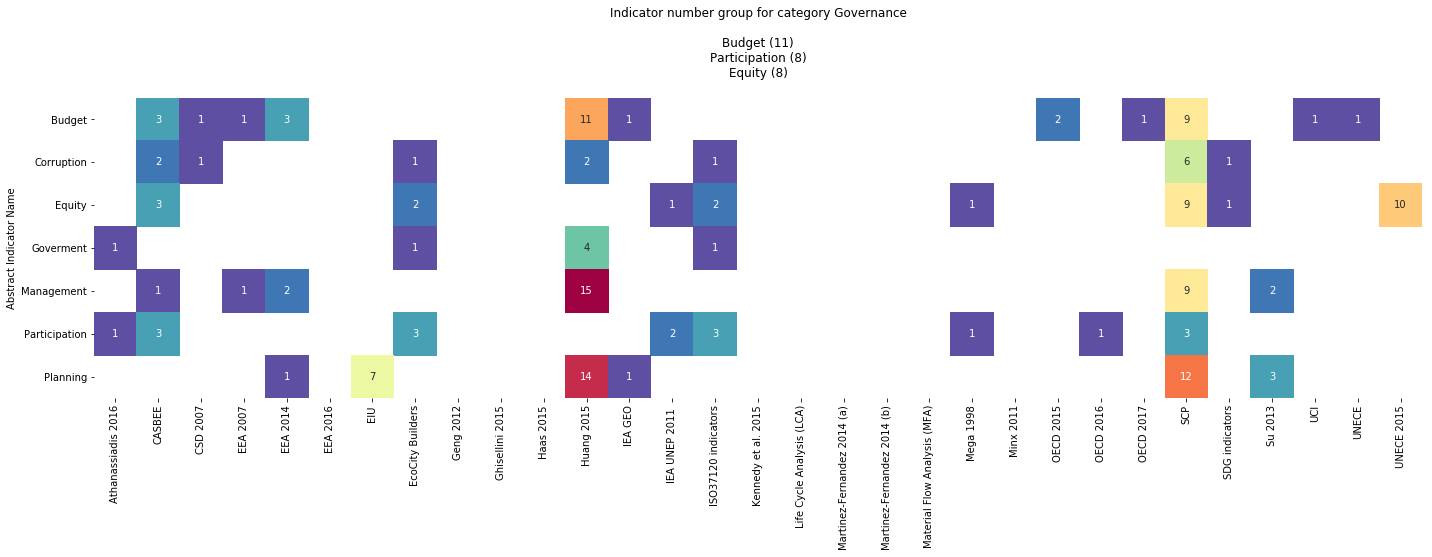

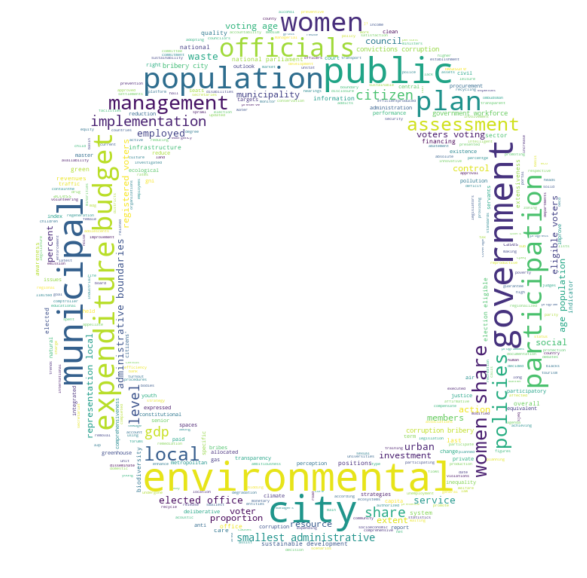

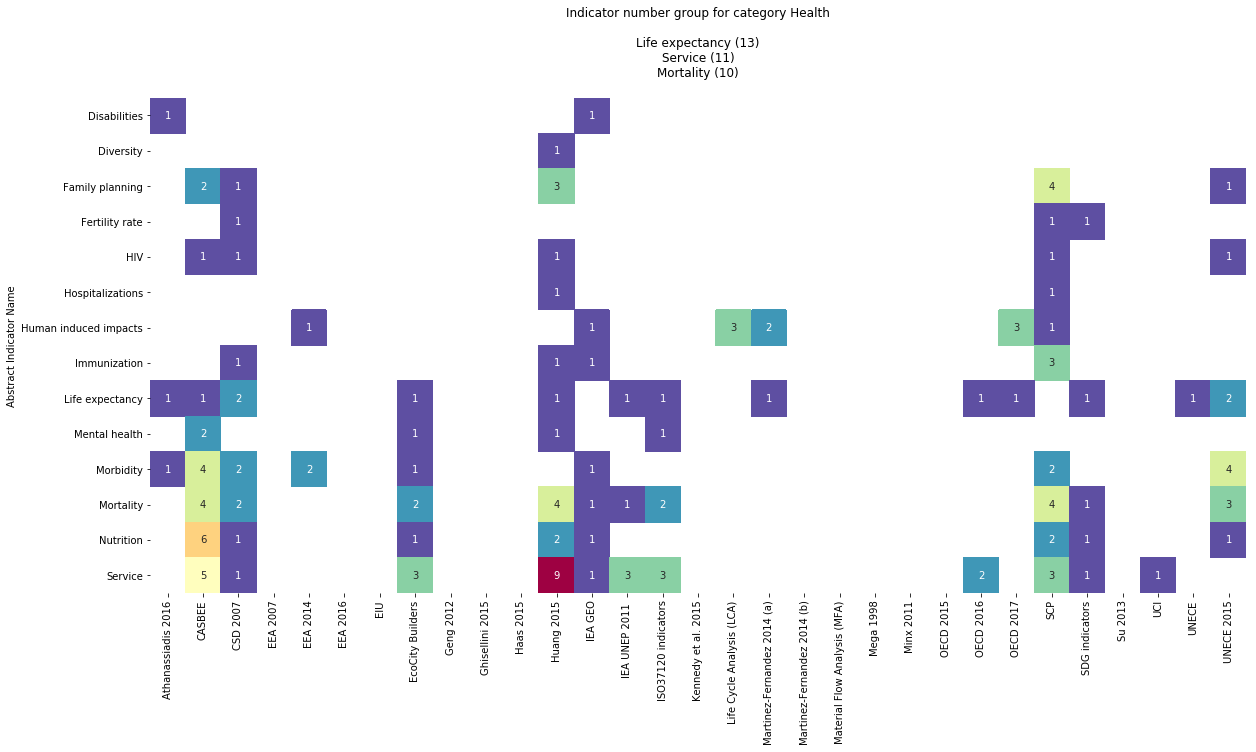

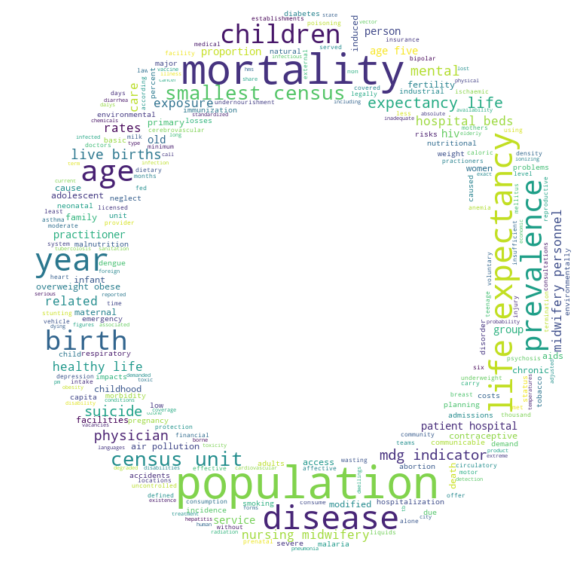

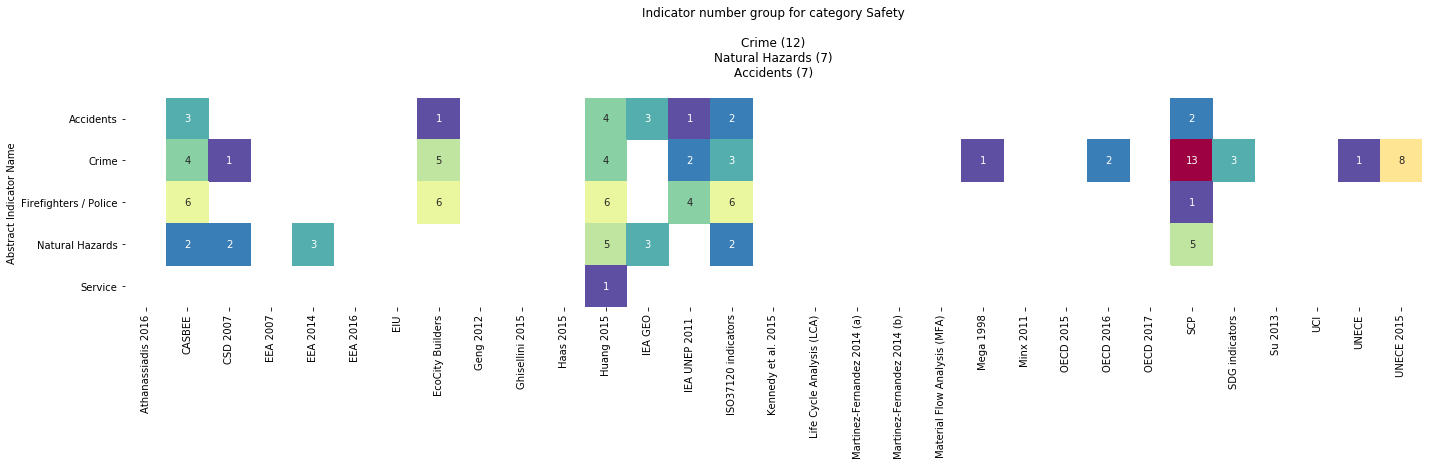

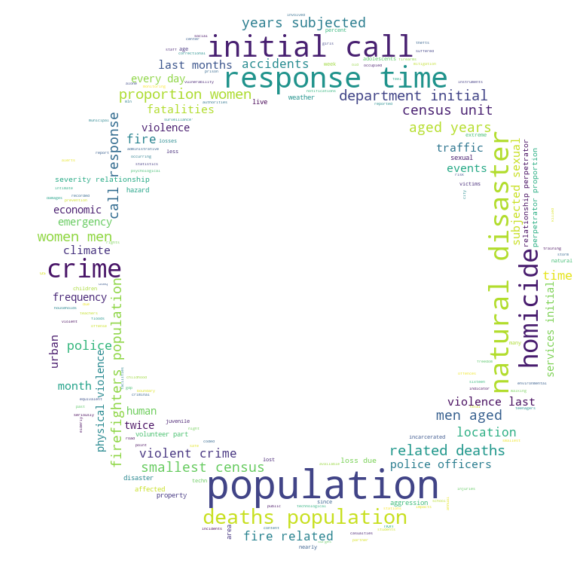

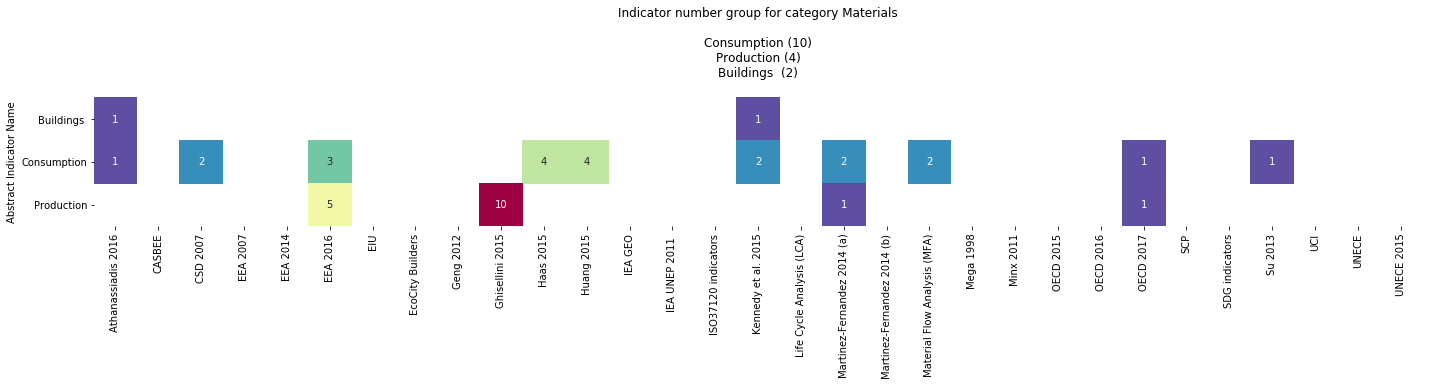

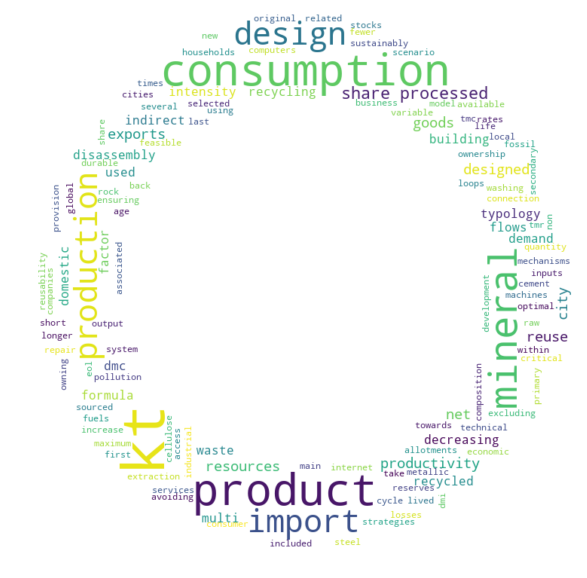

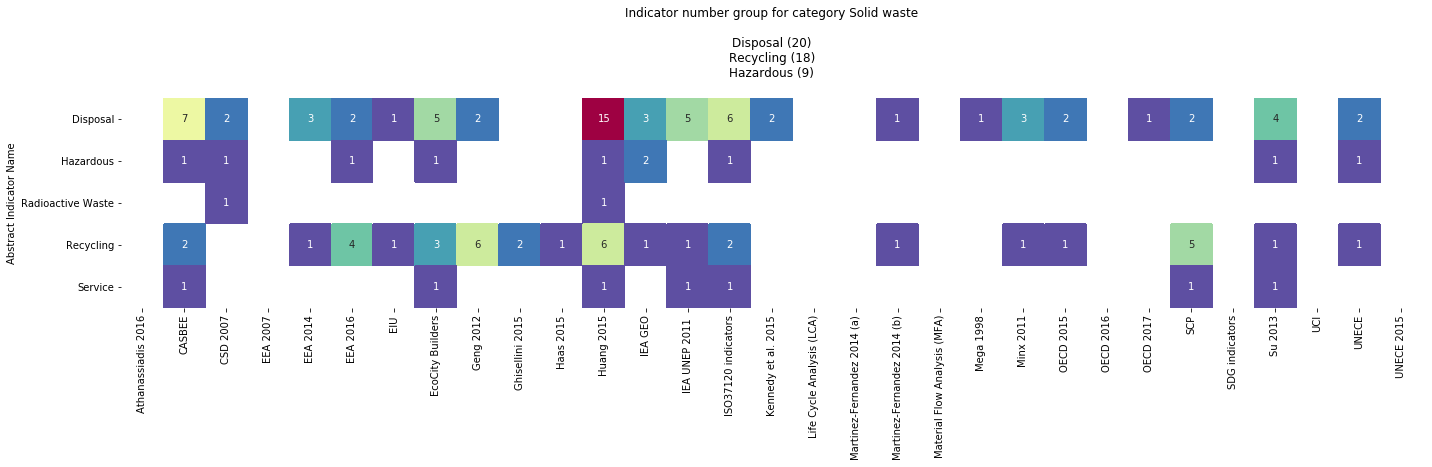

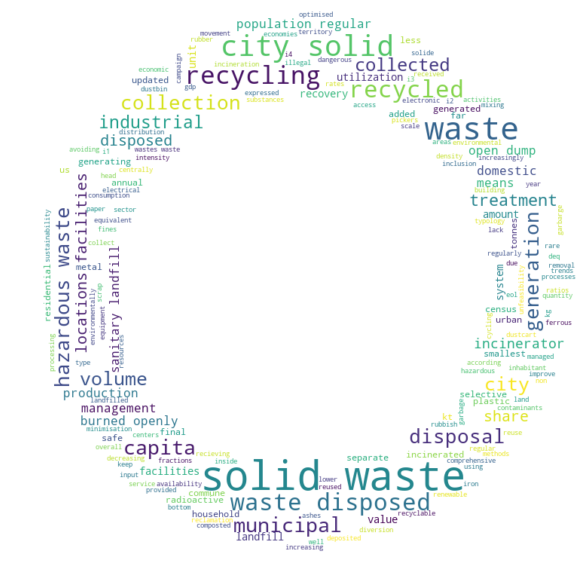

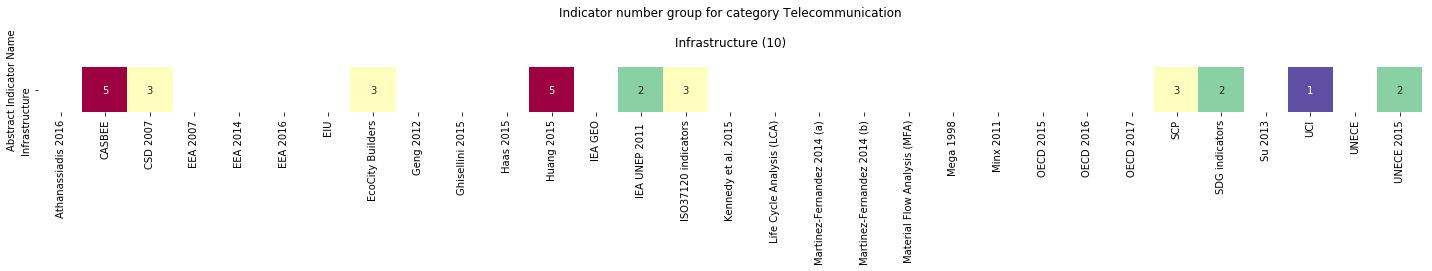

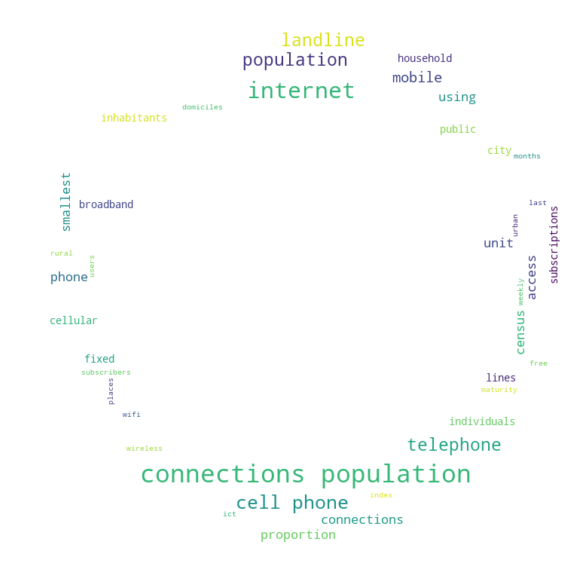

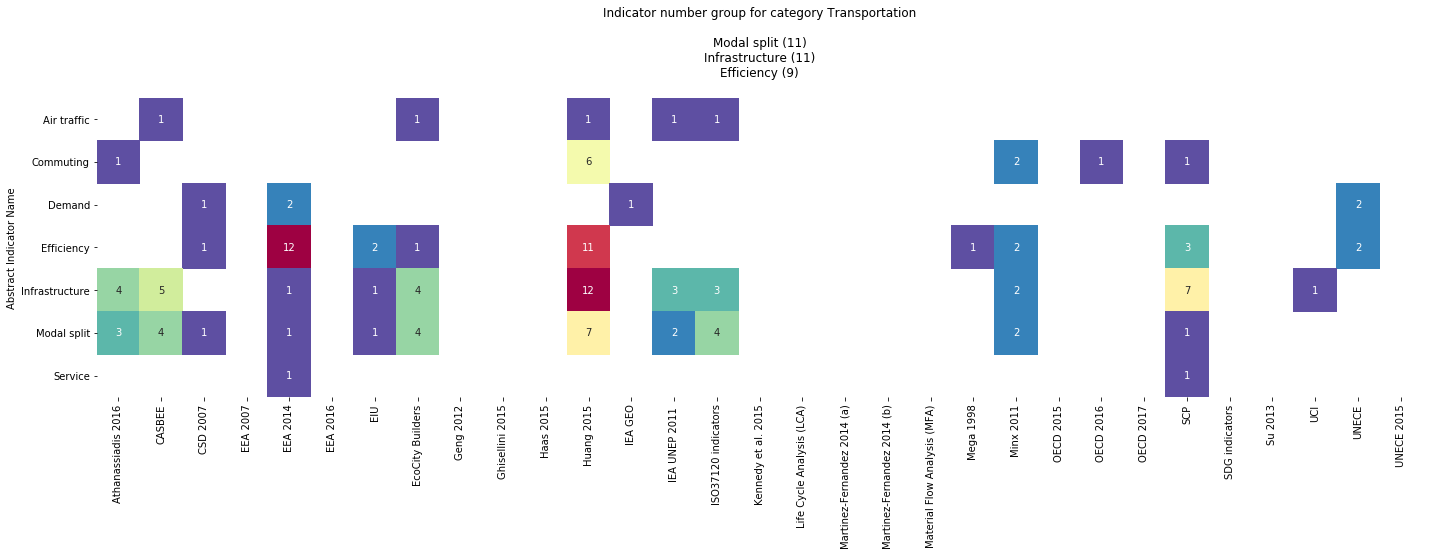

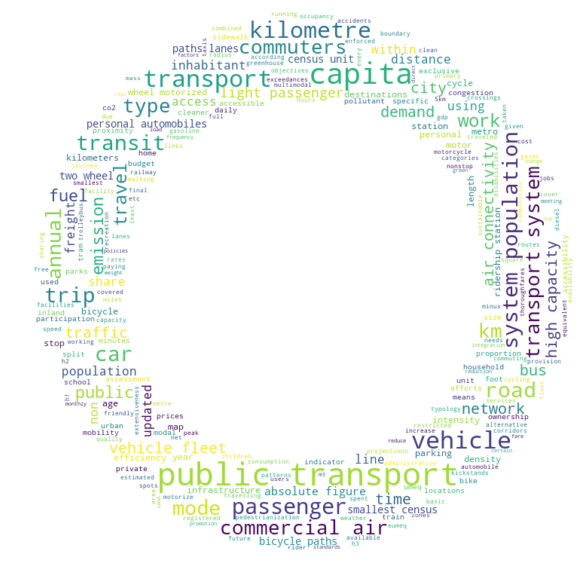

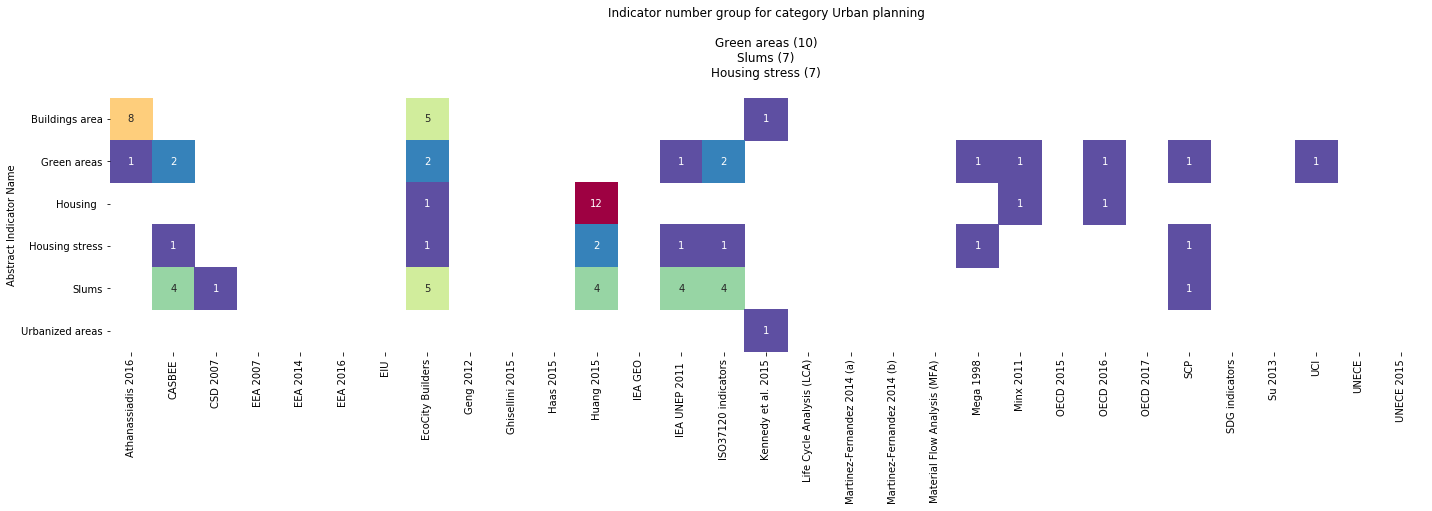

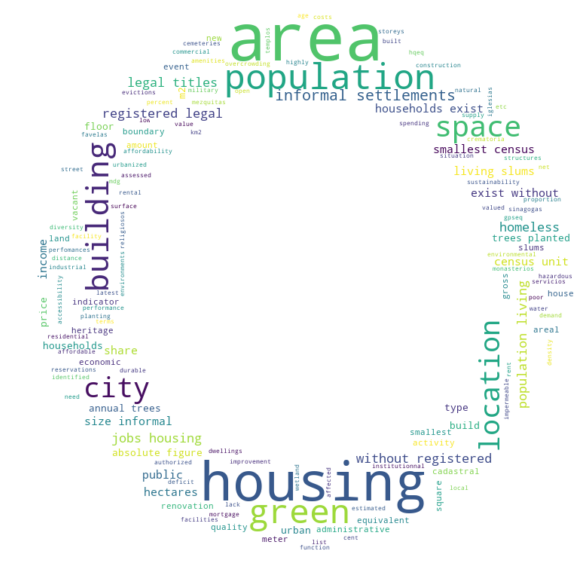

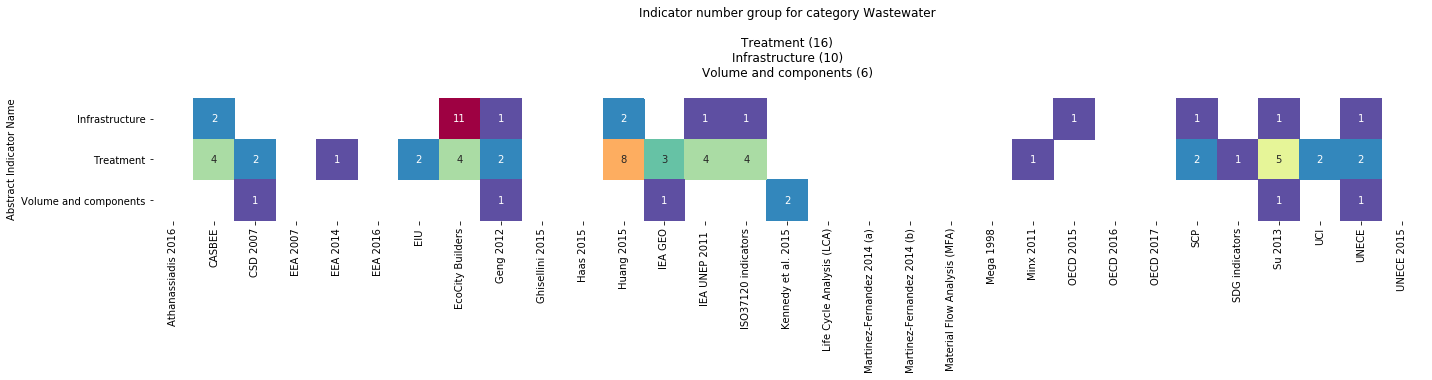

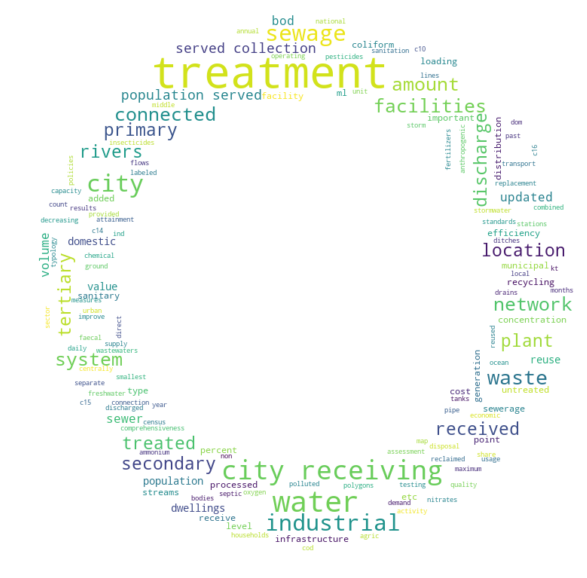

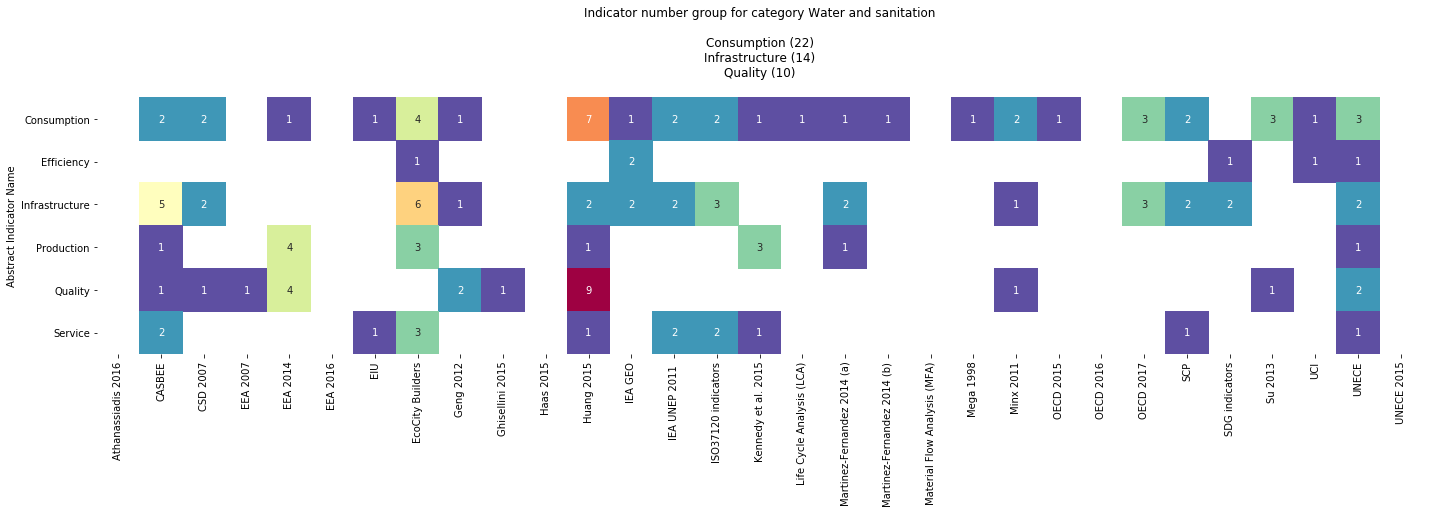

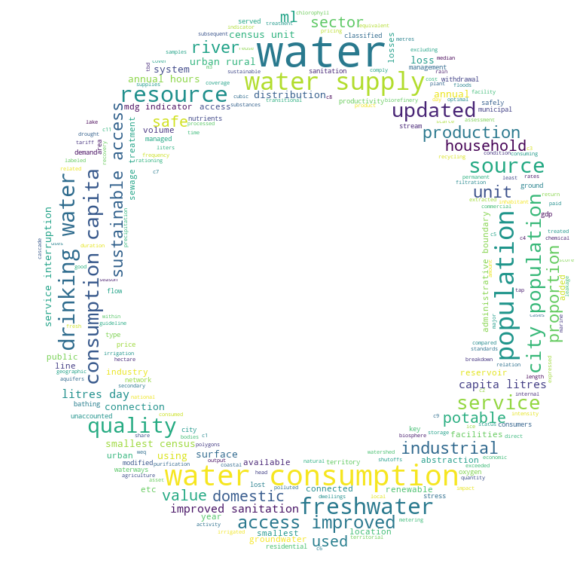

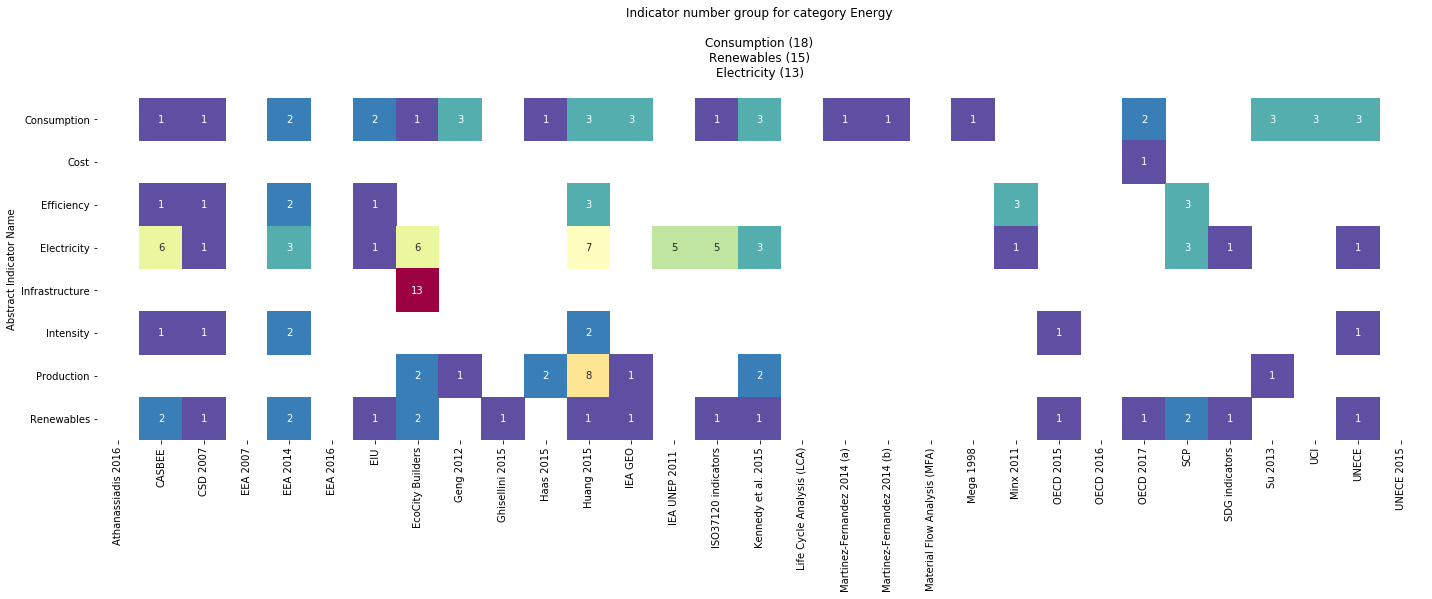

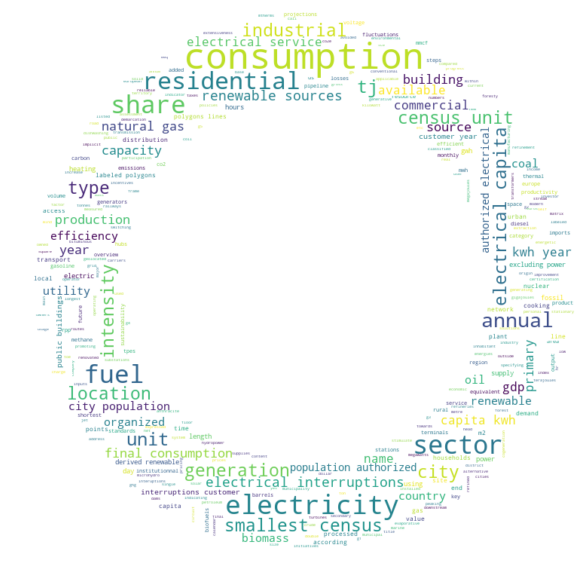

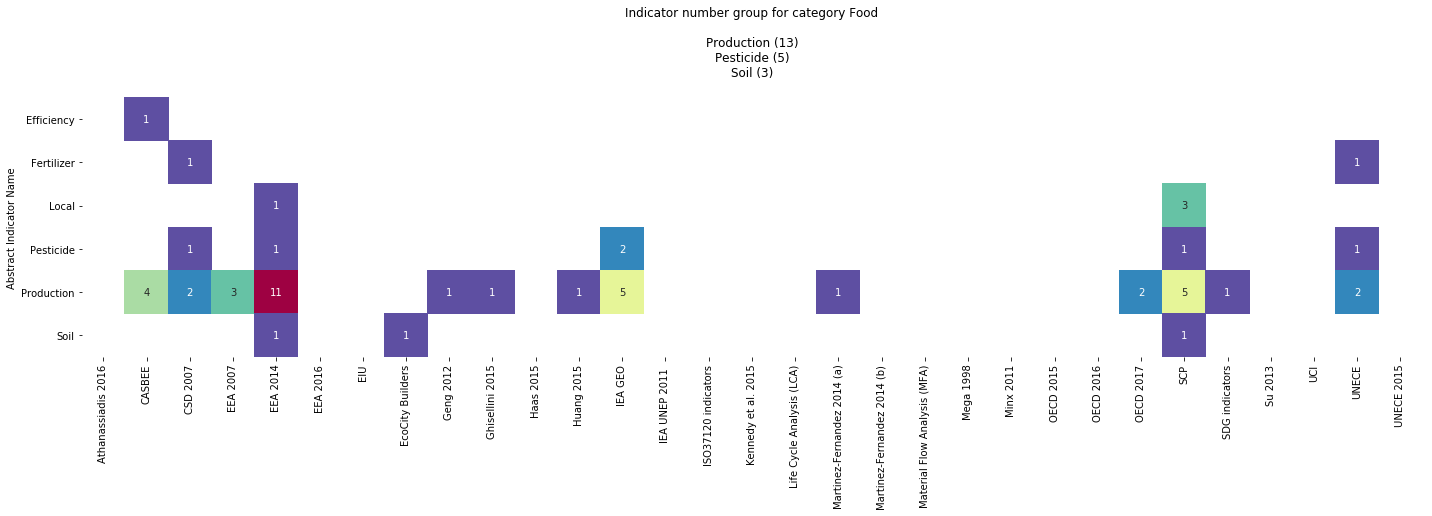

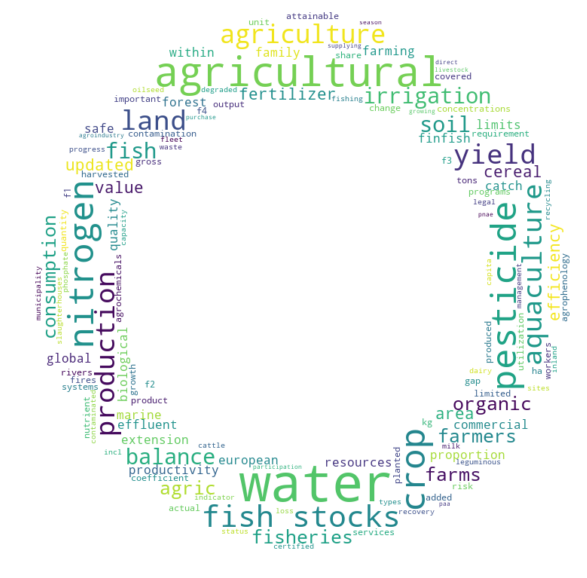

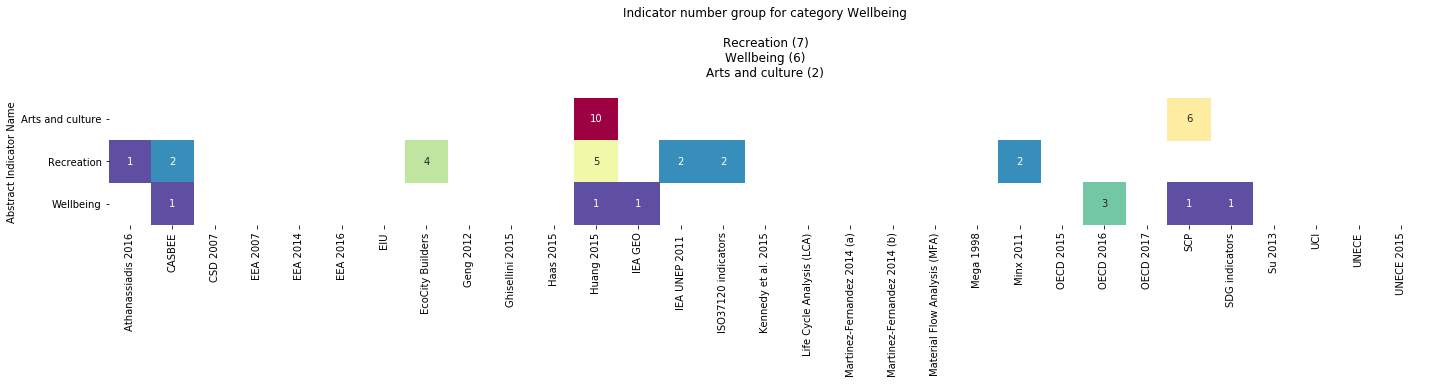

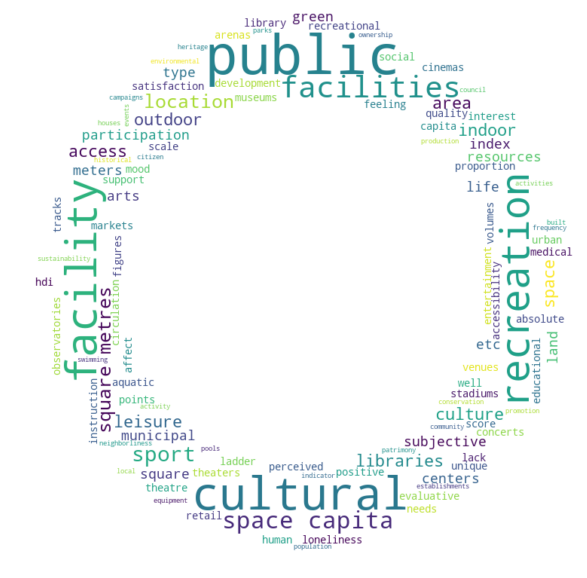

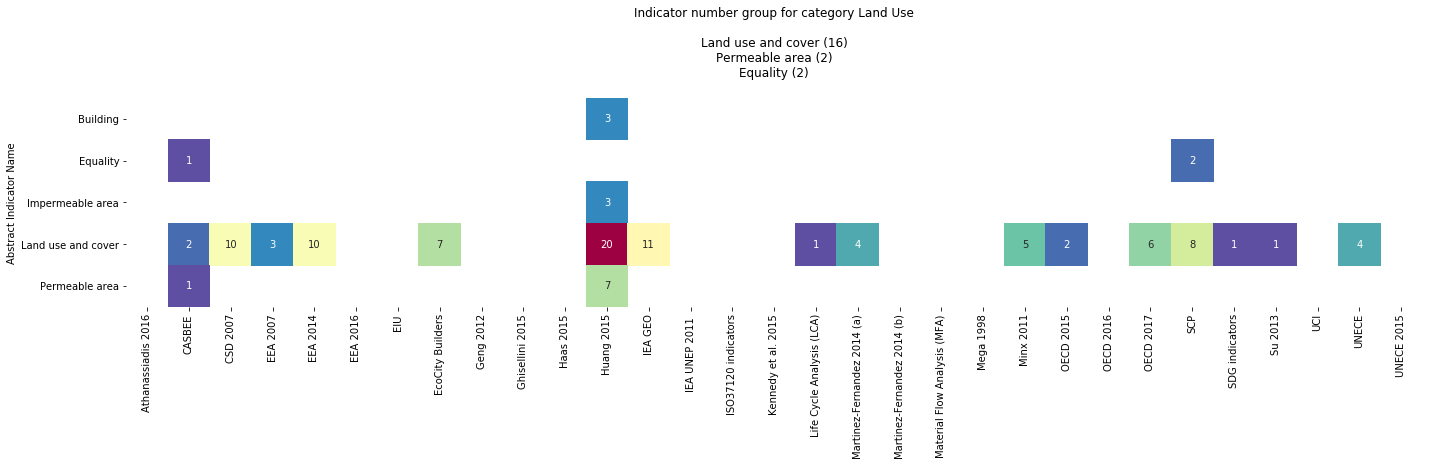

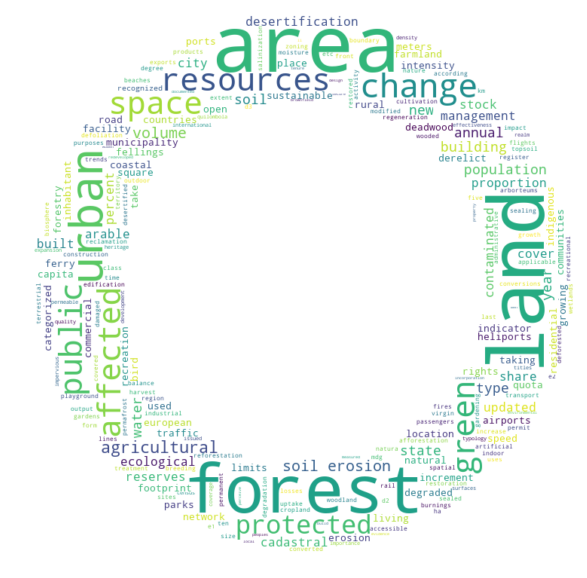

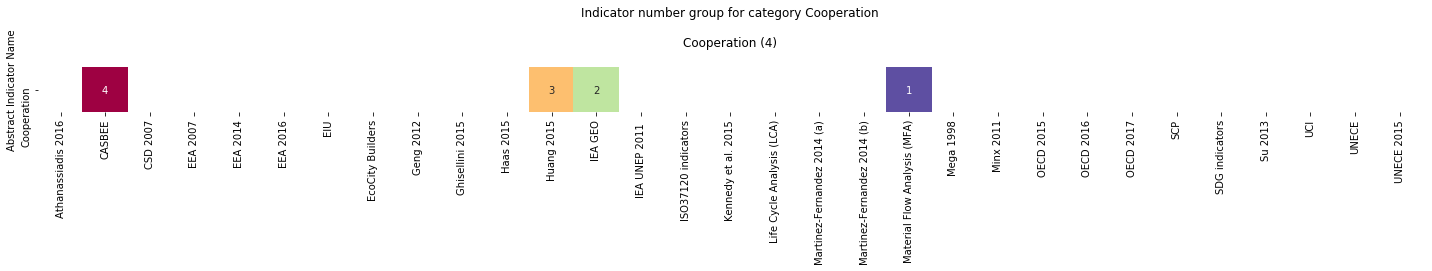

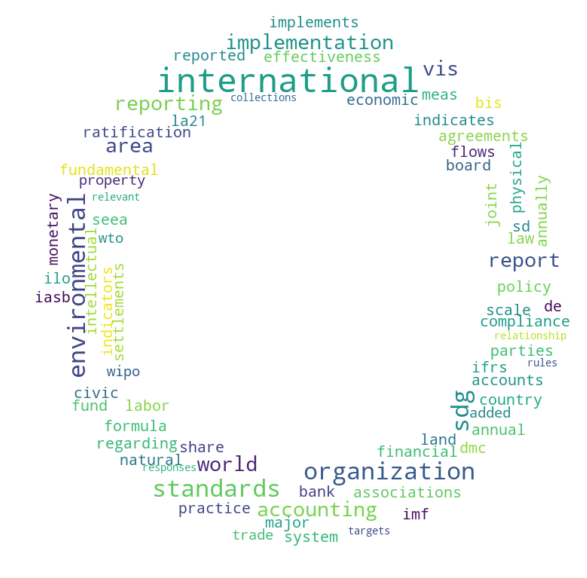

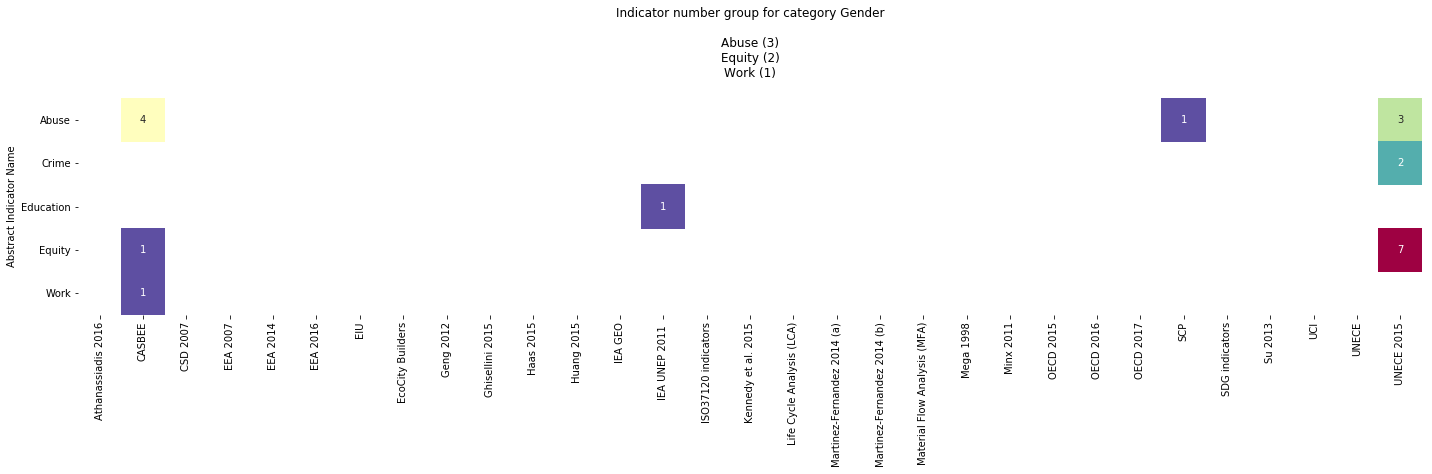

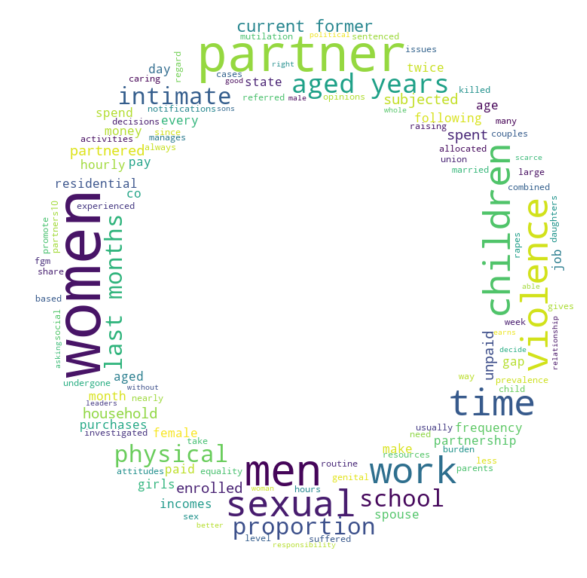

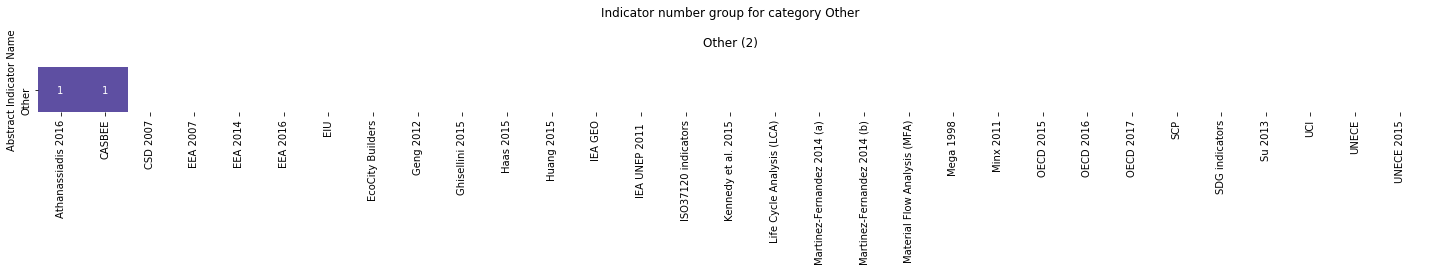

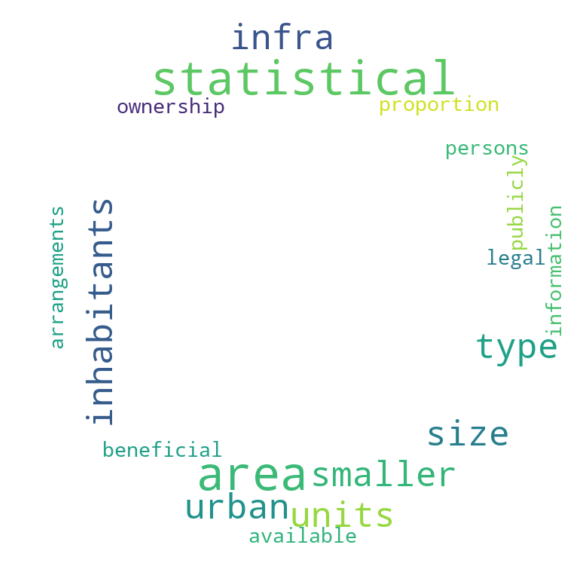

In [25]:
for cat in dataframe_trim_bin.loc[:, 'Category'].unique():
    # heatmap
    group_dataframe = dataframe_trim_bin.loc[dataframe_trim_bin.Category == cat]
    sub_group_dataframe = group_dataframe.groupby(['Abstract Indicator Name']).sum()
    h = 1 * sub_group_dataframe.shape[0]
    fig, ax = plt.subplots(figsize=(20, 10))
    sns.heatmap(sub_group_dataframe, annot=True, ax=ax,
                cmap='Spectral_r', cbar=False, square=True)
    sub_group_dataframe[sub_group_dataframe >= 1] = 1
    a = sub_group_dataframe.sum(axis=1).sort_values(ascending=False)[0:4]
    b = "\n".join(["{} ({})".format(a.index[e], int(i)) for e, i in enumerate(a)][0:3])
    ax.set_title("Indicator number group for category {}\n\n{}\n".format(cat, b))
    fig.tight_layout()
    plt.savefig("heatmap_cat_{}.png".format(cat), dpi=300)
    
    # tag cloud
    cloud_df = dataframe_trim.loc[dataframe_trim.Category == cat]
    cloud_df = cloud_df.loc[:, [i for i in cloud_df.columns if i not in ['Abstract Indicator Name', 'Category']]]
    text = ' '.join([i.strip().lower() for i in cloud_df.stack().tolist() if len(i) >= 2])
    # generate word cloud
    wc.generate(text)
    # store to file
    wc.to_file(path.join(d, "tagcloud_{}.png".format(cat)))
    # show
    plt.subplots(figsize=(10,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

    #break

In [26]:
for col in dataframe_map_cat.columns:
    print("{}".format(col))
    sub = dataframe_map_cat.loc[:, col].sort_values(ascending=False)[0:3]
    for i in sub.index:
        print("{} ({})".format(i, int(sub.loc[i])))
    print('\n')

Athanassiadis 2016
People (14)
Urban planning (9)
Transportation (8)


CASBEE
Health (25)
Economy (20)
Environment (15)


CSD 2007
Economy (14)
Environment (13)
Health (12)


EEA 2007
Environment (15)
Land Use (3)
Food (3)


EEA 2014
Environment (50)
Transportation (17)
Food (14)


EEA 2016
Materials (8)
Solid waste (7)
Environment (1)


EIU
Governance (7)
Environment (7)
Energy (5)


EcoCity Builders
Energy (24)
Economy (18)
Water and sanitation (17)


Geng 2012
Solid waste (8)
Water and sanitation (4)
Wastewater (4)


Ghisellini 2015
Materials (10)
Economy (3)
Solid waste (2)


Haas 2015
Materials (4)
Energy (3)
Economy (3)


Huang 2015
Economy (57)
Governance (46)
Transportation (37)


IEA GEO
Environment (14)
Land Use (11)
Health (7)


IEA UNEP 2011 
Economy (11)
Solid waste (7)
Safety (7)


ISO37120 indicators
Economy (19)
People (16)
Safety (13)


Kennedy et al. 2015
Energy (9)
Water and sanitation (5)
Geography and climate (5)


Life Cycle Analysis (LCA)
Environment (8)
Health (